# Projet 4 - Analysez les ventes de votre entreprise

Nous allons étudier les ventes de livres en ligne de la société.

Pour se faire nous allons tout d'abord nettoyer les données provenant de la base de donnée, ensuite les analyser pour en tirer les informations pertinentes, et enfin vérifier les corrélations suivantes :

* Y a-t-il une corrélation entre le sexe des clients et les catégories de produits achetés ?
* Y a-t-il une corrélation entre l'âge des clients et :
    * Le montant total des achats ;
    * La fréquence d’achat (ie. nombre d'achats par mois par exemple) ;
    * La taille du panier moyen (en nombre d’articles) ;
    * Les catégories de produits achetés.

Dans un premier temps, nous allons importer les données

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(color_codes = True)

In [2]:
customers = pd.read_csv('./Dataset/customers.csv')
products = pd.read_csv('./Dataset/products.csv')
transactions = pd.read_csv('./Dataset/transactions.csv', parse_dates=[1])

Nous allons, maintenant, regarder les dataFrames pour remarquer les valeurs manquantes

#### Fichier customers

In [3]:
customers.isnull().sum()

client_id    0
sex          0
birth        0
dtype: int64

In [4]:
customers.describe()

,birth
count,8623.000000
mean,1978.280877
std,16.919535
min,1929.000000
25%,1966.000000
50%,1979.000000
75%,1992.000000
max,2004.000000


In [5]:
customers['birth'].value_counts()

2004    440
1979    215
1988    207
1986    203
1978    199
       ... 
1935      8
1932      6
1931      4
1930      4
1929      3
Name: birth, Length: 76, dtype: int64

In [6]:
customers['birth'].mode()

0    2004
dtype: int64

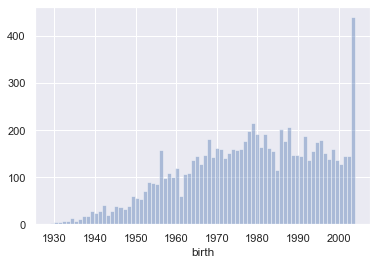

In [7]:
sns.distplot(customers['birth'], kde=False, bins=76)

Nous avons, ici, pour les années de naissances, environ 5% des clients qui sont nés en 2004. Est-ce un erreur ou une particularité à relever du site, qui cible les adolescents. Est-ce que dans l'inscription en ligne, cette année comprends les clients nés en 2004 et avant ?

Le reste du dataFrame ne présente pas de valeurs manquantes ou erronées

#### Fichier products

In [8]:
products.isnull().sum()

id_prod    0
price      0
categ      0
dtype: int64

In [9]:
products.describe()

,price,categ
count,3287.000000,3287.000000
mean,21.856641,0.370246
std,29.847908,0.615387
min,-1.000000,0.000000
25%,6.990000,0.000000
50%,13.060000,0.000000
75%,22.990000,1.000000
max,300.000000,2.000000


In [10]:
products['price'].value_counts()

4.99     85
6.99     84
3.99     80
5.99     78
8.99     74
         ..
4.13      1
2.84      1
13.13     1
18.77     1
9.00      1
Name: price, Length: 1455, dtype: int64

In [11]:
products['categ'].value_counts()

0    2309
1     739
2     239
Name: categ, dtype: int64

In [12]:
products.nsmallest(10, 'price')

,id_prod,price,categ
731,T_0,-1.00,0
2272,0_528,0.62,0
2355,0_202,0.62,0
370,0_120,0.66,0
1211,0_1844,0.77,0
1530,0_1620,0.80,0
2302,0_1364,0.81,0
2425,0_612,0.88,0
2772,0_902,0.92,0
686,0_2138,0.93,0


In [13]:
products.nlargest(10, 'price')

,id_prod,price,categ
947,2_2,300.00,2
724,2_76,254.44,2
394,2_158,247.22,2
1436,2_167,236.99,2
2779,2_30,233.54,2
1960,2_125,231.99,2
2487,2_166,230.04,2
786,2_40,228.11,2
10,2_228,225.17,2
1896,2_4,222.97,2


Nous remarquons qu'un produit à une valeur de -1, est-ce qu'il correspond à une valeur test, comme le 'T' dans son identifiant le laisse présager ?

Le reste du dataFrame ne présente pas de valeurs manquantes ou erronées.

#### Fichier transactions

In [14]:
transactions.isnull().sum()

id_prod       0
date          0
session_id    0
client_id     0
dtype: int64

In [15]:
transactions.describe()

,id_prod,date,session_id,client_id
count,337016,337016,337016,337016
unique,3266,336855,169195,8602
top,1_369,test_2021-03-01 02:30:02.237413,s_0,c_1609
freq,1081,13,200,12855


Nous constatons que certains articles n'ont pas été vendu, nous avons 3266 produits uniques de vendu sur un total de 3287 produits référencés. De plus, nous avons certains clients qui n'ont éffectués aucun achat, nous avons, dans le dataframe transaction 8502 clients uniques alors qu'il y a 8623 clients d'enregistrés.

Nous avons dans la colonne date une valeur test : test_2021-03-01 02:30:02.237413

#### Nettoyage

Tout d'abord, nous allons enlever les données de test rentrées dans les dataFrames.

In [16]:
transactions[transactions['date'].str.contains('test')]

,id_prod,date,session_id,client_id
1431,T_0,test_2021-03-01 02:30:02.237420,s_0,ct_1
2365,T_0,test_2021-03-01 02:30:02.237446,s_0,ct_1
2895,T_0,test_2021-03-01 02:30:02.237414,s_0,ct_1
5955,T_0,test_2021-03-01 02:30:02.237441,s_0,ct_0
7283,T_0,test_2021-03-01 02:30:02.237434,s_0,ct_1
...,...,...,...,...
332594,T_0,test_2021-03-01 02:30:02.237445,s_0,ct_0
332705,T_0,test_2021-03-01 02:30:02.237423,s_0,ct_1
332730,T_0,test_2021-03-01 02:30:02.237421,s_0,ct_1
333442,T_0,test_2021-03-01 02:30:02.237431,s_0,ct_1


Nous remarquons que les tests ont été fait avec d'autres éléments prédéfinis. Nous allons rechercher ces éléments pour les enlever de nos dataFrames pour éviter de fausser notre analyse.

In [17]:
transactions.loc[transactions['date'].str.contains('test')].describe()

,id_prod,date,session_id,client_id
count,200,200,200,200
unique,1,39,1,2
top,T_0,test_2021-03-01 02:30:02.237413,s_0,ct_0
freq,200,13,200,106


Nous remarquons que nous avons un produit unique (T_0), une session unique (s_0), et deux clients uniques (ct_0 et ct_1). Nous allons enlever ces éléments après vérification

In [18]:
transactions.loc[transactions['id_prod'] == 'T_0'].describe()

,id_prod,date,session_id,client_id
count,200,200,200,200
unique,1,39,1,2
top,T_0,test_2021-03-01 02:30:02.237413,s_0,ct_0
freq,200,13,200,106


Le client T_0 n'a été utilisé que pour les tests

In [19]:
transactions.loc[transactions['session_id'] == 's_0'].describe()

,id_prod,date,session_id,client_id
count,200,200,200,200
unique,1,39,1,2
top,T_0,test_2021-03-01 02:30:02.237413,s_0,ct_0
freq,200,13,200,106


De même, la session s_0 n'a été utilisé que pour les tests

In [20]:
transactions.loc[transactions['client_id'] == 'ct_0'].describe()

,id_prod,date,session_id,client_id
count,106,106,106,106
unique,1,37,1,1
top,T_0,test_2021-03-01 02:30:02.237413,s_0,ct_0
freq,106,9,106,106


In [21]:
transactions.loc[transactions['client_id'] == 'ct_1'].describe()

,id_prod,date,session_id,client_id
count,94,94,94,94
unique,1,37,1,1
top,T_0,test_2021-03-01 02:30:02.237414,s_0,ct_1
freq,94,5,94,94


Pour finir, les clients ct_0 et ct_1 ont été également utilisé que pour les tests.

Nous allons supprimer les 200 lignes contenant des dates de test

In [22]:
transactions = transactions[~transactions['date'].str.contains('test')]

Nous allons effacer le produit test T_0, d'une valeur négative, de la dataFrame products

In [23]:
products = products[~(products['id_prod'] == 'T_0')]

Nous allons effacer les clients ct_0 et ct_1 de la dataFrame customers

In [24]:
customers[customers['client_id'].str.contains('ct_')].describe()

,birth
count,2.0
mean,2001.0
std,0.0
min,2001.0
25%,2001.0
50%,2001.0
75%,2001.0
max,2001.0


Nous n'avons que deux clients possèdant le préfixe 'ct', les clients tests, que nous allons enlever du dataFrame

In [25]:
customers = customers[~customers['client_id'].str.contains('ct_')]

Nous allons convertir la colonne date du dataFrame transactions en valeur de type datetime64

In [26]:
transactions['date'] = pd.to_datetime(transactions['date'])

Nous allons merger les 3 dataFrames en 1 seul pour faciliter l'analyse des données

In [27]:
df_transactions = transactions.merge(customers, how = 'inner', on = 'client_id')

In [28]:
df_transactions = df_transactions.merge(products, how = 'inner', on= 'id_prod')

In [29]:
df_transactions.describe()

,birth,price,categ
count,336713.000000,336713.000000,336713.000000
mean,1977.823568,17.215189,0.430156
std,13.524433,17.855445,0.591082
min,1929.000000,0.620000,0.000000
25%,1971.000000,8.610000,0.000000
50%,1980.000000,13.900000,0.000000
75%,1987.000000,18.990000,1.000000
max,2004.000000,300.000000,2.000000


Nous utilisons des *inner joints* pour éviter l'ajout de valeur nulle dans notre dataFrame

#### Préparation du dataFrame

Maintenant, nous allons rajouter les colonnes 'age', 'weekday', 'daytime', 'month', 'week', 'session_amount', 'session_nb_produit', 'session_categ' 

In [30]:
df_transactions['age'] = df_transactions['date'].dt.year - df_transactions['birth']

In [31]:
df_transactions['weekday'] = df_transactions['date'].dt.dayofweek

In [32]:
df_transactions['daytime'] = df_transactions['date'].dt.hour

In [33]:
df_transactions['month'] = df_transactions['date'].dt.month

In [34]:
df_transactions['week'] = df_transactions['date'].dt.week

In [35]:
df_transactions = df_transactions.merge(df_transactions[['price', 'session_id']].groupby('session_id').sum(), how='left', on='session_id')

In [36]:
df_transactions.rename(columns = {'price_x' : 'price', 'price_y' : 'session_amount'}, inplace=True)

In [37]:
df_transactions = df_transactions.merge(df_transactions[['id_prod', 'session_id']].groupby('session_id').count(), how='left', on='session_id')

In [38]:
df_transactions.rename(columns = {'id_prod_x' : 'id_prod', 'id_prod_y' : 'session_nb_produit'}, inplace=True)

In [39]:
df_transactions = df_transactions.merge(df_transactions[['categ', 'session_id']].groupby('session_id').mean(), how='left', on='session_id')

In [40]:
df_transactions.rename(columns = {'categ_x' : 'categ', 'categ_y' : 'session_categ'}, inplace=True)

In [41]:
df_transactions.describe()

,birth,price,categ,age,weekday,daytime,month,week,session_amount,session_nb_produit,session_categ
count,336713.000000,336713.000000,336713.000000,336713.000000,336713.000000,336713.000000,336713.000000,336713.000000,336713.000000,336713.000000,336713.000000
mean,1977.823568,17.215189,0.430156,43.351261,2.992810,11.513687,6.482144,26.298091,44.132191,2.805680,0.430156
std,13.524433,17.855445,0.591082,13.532614,2.000611,6.919571,3.519844,15.351025,35.344083,1.632548,0.501996
min,1929.000000,0.620000,0.000000,17.000000,0.000000,0.000000,1.000000,1.000000,0.620000,1.000000,0.000000
25%,1971.000000,8.610000,0.000000,34.000000,1.000000,6.000000,3.000000,13.000000,21.640000,2.000000,0.000000
50%,1980.000000,13.900000,0.000000,42.000000,3.000000,12.000000,6.000000,26.000000,35.910000,2.000000,0.333333
75%,1987.000000,18.990000,1.000000,51.000000,5.000000,18.000000,9.000000,39.000000,55.850000,4.000000,0.666667
max,2004.000000,300.000000,2.000000,93.000000,6.000000,23.000000,12.000000,52.000000,539.230000,14.000000,2.000000
